### Imports

In [130]:
from utils.HANNA_predictor import HANNA_Predictor
import matplotlib.pyplot as plt
from utils.utils import plot_predictions_binary, plot_predictions_ternary


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialize HANNA model

In [131]:
predictor = HANNA_Predictor()

Loading weights:   0%|          | 0/55 [00:00<?, ?it/s]

Loading ensemble with 10 models...


### Predicting binary $\ln \gamma_i, g^\mathrm{E}$ and $ h^\mathrm{E} $


############################################################
Predictions for system CCOC(=O)OCC-CCCCCCCCO
Temperature: 300 K

Composition 1 : [0.3 0.7]
	Logarithmic activity coefficients:
		CCOC(=O)OCC: 0.66
		CCCCCCCCO: 0.10

	Excess Gibbs energy:
		g^E/RT = 0.27

Composition 2 : [0.1 0.9]
	Logarithmic activity coefficients:
		CCOC(=O)OCC: 1.02
		CCCCCCCCO: 0.01

	Excess Gibbs energy:
		g^E/RT = 0.11
############################################################



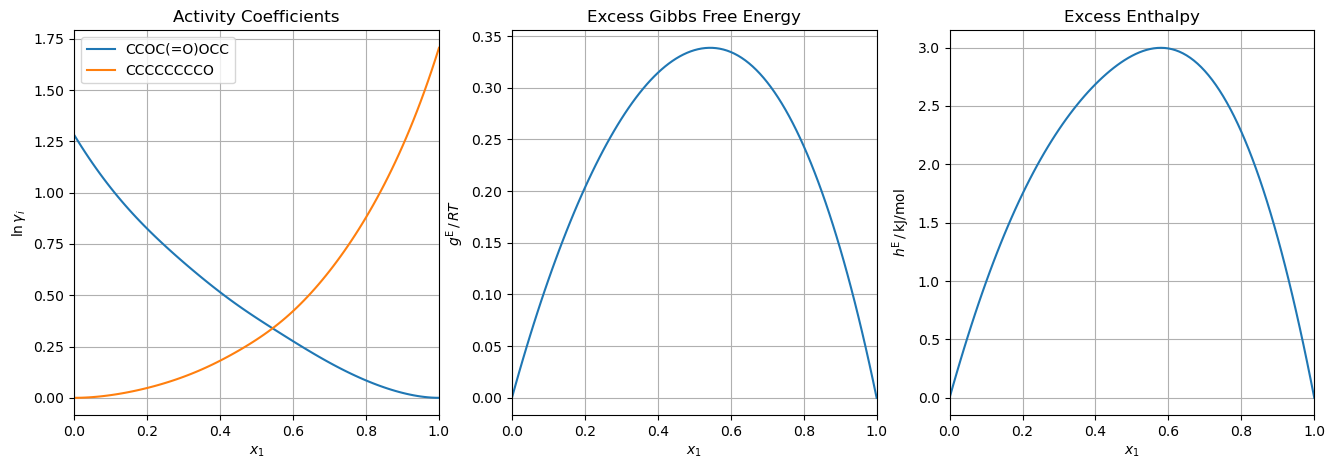

In [132]:
# Specify the system SMILES, here: Carbonic acid diethyl ester - 1-Octanol
smiles_list = ['CCOC(=O)OCC', 'CCCCCCCCO']

# Temperature in Kelvin
temperature = 300

### Predict only for specific compositions ####
# Input mole fractions of all components (two different state points)
molar_fractions = [[0.3, 0.7], 
                   [0.1, 0.9]]

ln_gammas, gE = predictor.predict(
    smiles_list=smiles_list,
    molar_fractions=molar_fractions,
    temperature=temperature,
    verbose=True
)
###############################################

### Predict over entire composition range #####
molar_fractions_all, ln_gammas, gE, hE = predictor.predict_over_composition(
    smiles_list=smiles_list,
    temperature=temperature,
)

plot_predictions_binary(smiles_list, molar_fractions_all, ln_gammas, gE, hE)
###############################################


### Predicting ternary $\ln \gamma_i, g^\mathrm{E}$ and $ h^\mathrm{E} $


############################################################
Predictions for system C=CCCCC-Cc1ccccc1-CS(C)=O
Temperature: 300 K

Composition 1 : [0.6 0.3 0.1]
	Logarithmic activity coefficients:
		C=CCCCC: 0.13
		Cc1ccccc1: 0.08
		CS(C)=O: 2.14

	Excess Gibbs energy:
		g^E/RT = 0.32

Composition 2 : [0.2 0.5 0.3]
	Logarithmic activity coefficients:
		C=CCCCC: 0.66
		Cc1ccccc1: 0.12
		CS(C)=O: 0.97

	Excess Gibbs energy:
		g^E/RT = 0.48

Composition 3 : [0.1 0.2 0.7]
	Logarithmic activity coefficients:
		C=CCCCC: 1.88
		Cc1ccccc1: 0.67
		CS(C)=O: 0.21

	Excess Gibbs energy:
		g^E/RT = 0.47
############################################################



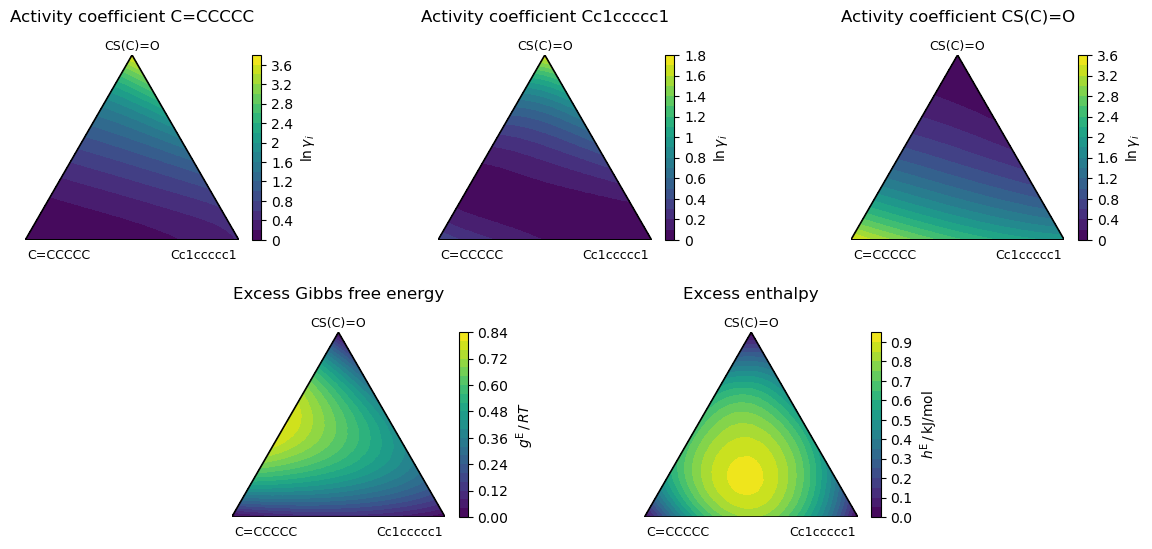

In [133]:
# Specify the system SMILES, here: 1-Hexene, Toluene, DMSO
smiles_list = ['C=CCCCC', 'Cc1ccccc1', 'CS(C)=O']

# Temperature in Kelvin
temperature = 300

### Predict only for specific compositions ##########
# Input mole fractions of all components (three different state points)
molar_fractions = [
    [0.60, 0.30, 0.10],
    [0.20, 0.50, 0.30],
    [0.10, 0.20, 0.70],
]

ln_gammas, gE = predictor.predict(
    smiles_list=smiles_list,
    molar_fractions=molar_fractions,
    temperature=temperature,
    verbose=True
)
#####################################################


### Predict over entire ternary composition range ### 
molar_fractions_all, ln_gammas, gE, hE = predictor.predict_over_composition(
    smiles_list=smiles_list,
    temperature=temperature,
)

plot_predictions_ternary(smiles_list, molar_fractions_all, ln_gammas, gE, hE)
######################################################